In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

## PCA method

In [2]:
# Create a random matrix shape (3000,3), value from 1 to 255
A = np.random.randint(1,256,(3000,3))
A.shape

(3000, 3)

In [3]:
A

array([[187,  40, 200],
       [  2,  31,   5],
       [248,  18,  21],
       ...,
       [241,  85, 234],
       [ 36, 252, 254],
       [223,  54,  61]])

In [4]:
# center columns by subtracting column means
M = np.mean(A.T, axis = 1)
C = A - M
C[0:10]

array([[  60.34333333,  -88.41333333,   69.172     ],
       [-124.65666667,  -97.41333333, -125.828     ],
       [ 121.34333333, -110.41333333, -109.828     ],
       [  34.34333333,  -37.41333333, -109.828     ],
       [  65.34333333,   85.58666667,  -83.828     ],
       [ -76.65666667,   77.58666667,   12.172     ],
       [ -51.65666667,   -9.41333333,   38.172     ],
       [-106.65666667,   18.58666667, -118.828     ],
       [  93.34333333,   -9.41333333,  -87.828     ],
       [  92.34333333,  -58.41333333,  118.172     ]])

In [5]:
# calculate covariance matrix of centered matrix
V = np.cov(C.T)

In [6]:
V

array([[5493.95810826,  -67.20815827,   49.66950317],
       [ -67.20815827, 5441.21489385,  -22.33168389],
       [  49.66950317,  -22.33168389, 5501.76633811]])

In [7]:
# factorize covariance matrix
values, vectors = np.linalg.eig(V)
values

array([5577.82925238, 5394.35321663, 5464.75687121])

In [8]:
vectors

array([[-0.6905369 ,  0.59250828, -0.41484061],
       [ 0.43426519,  0.79828959,  0.4173098 ],
       [-0.57842246, -0.10801698,  0.80855414]])

In [9]:
V.dot(vectors[:,0])

array([-3851.69690806,  2422.25708735, -3226.3416899 ])

In [10]:
vectors[:,0] * values[0]

array([-3851.69690806,  2422.25708735, -3226.3416899 ])

In [11]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-120.07476937  -42.29726969   -5.99930915]
 [ 116.55854872 -138.03259645  -90.67764155]
 [ -68.21373489   -4.38159615 -185.21659292]
 ...
 [-157.48819171   21.94863165   17.8690798 ]
 [  45.02571017   31.6384565   188.77322497]
 [ -58.45366376    5.22344293 -127.48025916]]


In [16]:
P.T

array([[-120.07476937,  -42.29726969,   -5.99930915],
       [ 116.55854872, -138.03259645,  -90.67764155],
       [ -68.21373489,   -4.38159615, -185.21659292],
       ...,
       [-157.48819171,   21.94863165,   17.8690798 ],
       [  45.02571017,   31.6384565 ,  188.77322497],
       [ -58.45366376,    5.22344293, -127.48025916]])

In [29]:
vectors.T.dot(A.T)

array([[ 13.86607965,  22.19068291,  18.25739085, ...,  81.40605706,
        -16.03122603, -81.10765892],
       [295.35046287, 382.95336195, 172.55544953, ..., 157.5602089 ,
         48.47484363, 166.65462329],
       [ 61.78863907,  72.98832897,  41.48836604, ...,  49.69742895,
         40.35082808,  39.08688018]])

## E.g: student

In [31]:
data = pd.read_excel("student.xlsx", index_col=0)
data.head()

,Math,English,Art
Student,,,
1,90,60,90
2,90,90,30
3,60,60,60
4,60,60,90
5,30,30,30


In [32]:
pca = PCA(2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
print(pca.components_)
print(pca.components_.shape)
print(pca.explained_variance_)
print(pca.explained_variance_.shape)

[[-0.59862919 -0.51336438 -0.61489845]
 [ 0.47005554  0.39643891 -0.78859621]]
(2, 3)
[605.64181179 313.26463747]
(2,)


In [34]:
B = pca.transform(data)
B[0:5]

array([[-28.71093503, -11.33365494],
       [ -7.21795959,  47.87528492],
       [  7.69489417,  -1.77743486],
       [-10.75205928, -25.43532109],
       [ 59.50165485,  -4.11438216]])

In [38]:
pca.explained_variance_ratio_

array([0.57863867, 0.29929742])

In [39]:
principalDf = pd.DataFrame(data = B
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-28.710935,-11.333655
1,-7.217960,47.875285
2,7.694894,-1.777435
3,-10.752059,-25.435321
4,59.501655,-4.114382


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

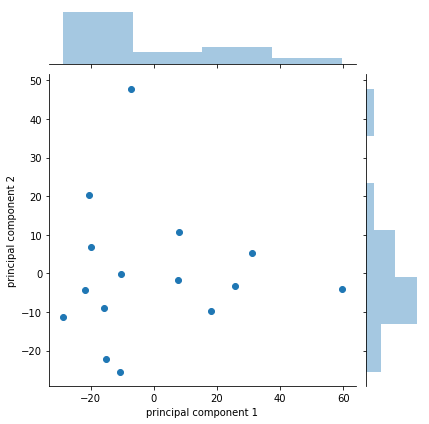

In [40]:
plt.figure(figsize=(8,6))
sns.jointplot(x='principal component 1', y='principal component 2', data = principalDf)
plt.show()

## E.g: Face

In [42]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [43]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [44]:
faces.images[0].shape

(62, 47)

In [45]:
faces.data[0].size

2914

In [46]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
pca.explained_variance_ratio_

array([0.18776782, 0.14548896, 0.07103531, 0.06026756, 0.05040748,
       0.02936598, 0.02470622, 0.02047527, 0.01968445, 0.01891782,
       0.01560988, 0.01470453, 0.01214073, 0.01095572, 0.01042816,
       0.00972052, 0.00906779, 0.00876521, 0.00813087, 0.00705088,
       0.00682341, 0.00648109, 0.00603545, 0.00578568, 0.00532363,
       0.00520648, 0.00500154, 0.00476372, 0.0045244 , 0.00425308,
       0.00405166, 0.00380144, 0.00360033, 0.00350987, 0.00347687,
       0.00324892, 0.00314407, 0.00310621, 0.00307643, 0.00290165,
       0.00282754, 0.0027487 , 0.00272783, 0.00259985, 0.00246388,
       0.00238214, 0.0023496 , 0.00231576, 0.00227235, 0.00221907,
       0.00210642, 0.00205901, 0.00202986, 0.00200763, 0.00195911,
       0.00195431, 0.00188171, 0.00182909, 0.00176752, 0.00175944,
       0.00174918, 0.00166451, 0.00161345, 0.00158637, 0.00156621,
       0.00152925, 0.00149928, 0.00146113, 0.0014524 , 0.00141118,
       0.0014053 , 0.00136441, 0.00136221, 0.00131673, 0.00129

In [50]:
x = sum(pca.explained_variance_ratio_)
x

0.9457227184611838

In [51]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

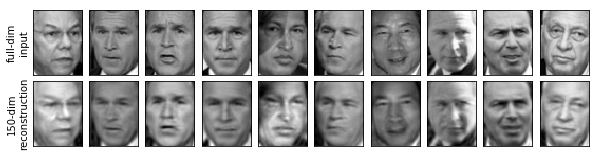

In [56]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

In [61]:
import scipy.stats

In [62]:
scipy.stats.t.ppf((1 + 0.95) / 2., 5)

2.5705818366147395